In [2]:
import numpy as np
import pandas as pd
import json
import os
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap
import itertools
from utils.lists import *
import seaborn as sns
from collections import Counter
import glob
import warnings
warnings.filterwarnings('ignore')

# ED Fig. 3a 14 DEG lists cosine similarity

In [3]:
import math
def counter_cosine_similarity(c1, c2):
    terms = set(c1).union(c2)
    dotprod = sum(c1.get(k, 0) * c2.get(k, 0) for k in terms)
    magA = math.sqrt(sum(c1.get(k, 0)**2 for k in terms))
    magB = math.sqrt(sum(c2.get(k, 0)**2 for k in terms))
    return dotprod / (magA * magB)

In [4]:
deg_all = pd.read_csv('/home/ah2428/palmer_scratch/supp_tables/txt/PTSD_DEG_MAST_and_Wilcox.txt',sep='\t')

In [12]:
degs = []
for i in ['CUX2','RORB','FEZF2','OPRK1','LAMP5','KCNG1','VIP','SST','PVALB','OLG','OPC','END','AST','MG']:
    deg = deg_all[deg_all.Celltype==i]
    up = deg[deg['MAST log2FC'] > 0].Genename
    down = deg[deg['MAST log2FC'] < 0].Genename
    deg = np.append(up,down)
    degs.append(list(deg))

In [13]:
sim = []
for i in degs:
    for j in degs:
        s = counter_cosine_similarity(Counter(i),Counter(j))
        sim.append(s)

In [14]:
sim = np.array(sim).reshape(14,14)

In [15]:
parameterToColorBy = np.linspace(5, 10, 6, dtype=float)

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=-1):
    if n == -1:
        n = cmap.N
    new_cmap = mcolors.LinearSegmentedColormap.from_list(
         'trunc({name},{a:.2f},{b:.2f})'.format(name=cmap.name, a=minval, b=maxval),
         cmap(np.linspace(minval, maxval, n)))
    return new_cmap

minColor = 0.5
maxColor = 0
red_t = truncate_colormap(plt.get_cmap("bwr_r"), minColor, maxColor)

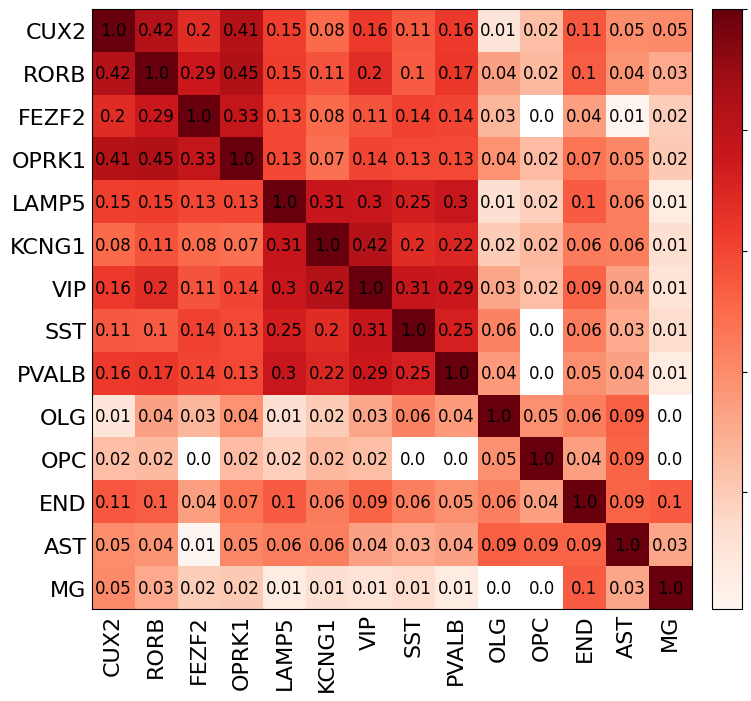

In [19]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.size']= '16'
fig = plt.figure(figsize=(10,10))
celltypes = ['CUX2','RORB','FEZF2','OPRK1','LAMP5','KCNG1','VIP','SST','PVALB','OLG','OPC','END','AST','MG']

axmatrix = fig.add_axes([0.3,0.1,0.6,0.6])
im = axmatrix.matshow(np.log(sim), aspect='auto', cmap='Reds')
axmatrix.set(xticks=np.arange(len(celltypes)),xticklabels=celltypes)
axmatrix.set_xticklabels(celltypes,rotation=90)
axmatrix.tick_params(axis="x", labelbottom=True, labeltop=False)
axmatrix.set(yticks=np.arange(len(celltypes)),yticklabels=celltypes)
axmatrix.tick_params(axis=u'both', which=u'both',length=0)

axcolor = fig.add_axes([0.92,0.1,0.03,0.6])
cbar = plt.colorbar(im, cax=axcolor)
cbar.set_ticklabels(' ')

for i in range(len(celltypes)):
    for j in range(len(celltypes)):
        axmatrix.text(i,j,np.round(sim[i,j],2),ha="center", va="center",fontsize=12)

axmatrix.set_xticks(np.arange(-0.5, sim.shape[0]-1),minor=True)
plt.savefig('/home/ah2428/palmer_scratch/figs/ed3/deg_cosine_sim.pdf',bbox_inches='tight',dpi=500)

# ED Fig. 3b 1184 PTSD snDEGs GO

In [39]:
rna_deg = deg_all[deg_all.Celltype.isin(['EXC','INH','OLI','OPC','END','AST','MIC'])].Genename.unique()

In [40]:
len(rna_deg)

1184

In [6]:
for d in rna_deg:
    print(d)

FKBP5
ZBTB16
CRYAB
ITGAV
KLF9
RANBP17
STAT3
SORL1
NDRG1
SETD7
PDE8B
TCF25
NFKBIA
KCNK10
SAMHD1
ARRDC2
PLPP4
RASD1
GPC5
GPNMB
CD81
SCG3
ITM2C
HEPN1
APOE
RAB11A
FTL
PAPPA
UNC13C
EIF1
CEBPD
TPT1
YBX3
CD59
EEF1A1
TMSB10
TM4SF1
IFITM3
ADAMTS9
PITPNC1
FAU
IFITM2
ACTG1
PTMA
EDN1
NACA
PNP
LDHA
HRCT1
TNFRSF6B
ATP1A1
TMA7
RHOB
EIF4A1
JUND
PTMS
UBA52
SLCO4A1
MT1X
ELL2
MAFF
RGCC
PFDN5
GPR4
PHLDA1
SERF2
ICAM2
CLIC1
AKAP12
CD63
ENPEP
SSTR2
PSMA7
YBX1
SAMD4A
SRP14
MAFK
IL4R
MYL6
CCNI
H2AFZ
MYL12A
GADD45B
TMSB4X
CHSY1
MT2A
TNFRSF12A
SET
PLXNA2
HIGD1B
EEF1B2
EEF2
SPARC
UBL5
C2CD4B
GJA4
EIF2S2
GNG5
RACK1
CDH5
MYL12B
NPM1
KCTD12
NME2
EEF1G
PABPC1
LGALS1
ATP1B3
SLC26A2
PPA1
ANGPT2
MIF
OST4
NCL
BTF3
HNRNPA1
S100A6
TUBB4B
C19orf53
TPM3
CDKN1A
TAGLN2
OAZ1
GABARAP
KCNE4
EDF1
APOLD1
ADGRG1
EEF1D
KRT10
CLU
UBC
GABARAPL2
RELL1
MZT2B
IL18R1
STX12
BTG1
RAC1
MRFAP1
TSC22D3
CRIM1
ELOB
SEC62
H2AFJ
HMGN2
SEC61B
H3F3A
SERTAD1
ARL6IP4
TXN
HES4
TUBB
PTTG1IP
LAMB1
ATP6V1G1
CHMP3
GAPDH
EMP1
HMGB1
H3F3B
ADM
BAG1
PECAM1
GNG1

In [20]:
bp = pd.read_csv('/home/ah2428/ShareZhangLab/PTSD/RNA/GO/1184_RNA_DEG_GO/BP.txt',sep='\t')
cc = pd.read_csv('/home/ah2428/ShareZhangLab/PTSD/RNA/GO/1184_RNA_DEG_GO/CC.txt',sep='\t')
mf = pd.read_csv('/home/ah2428/ShareZhangLab/PTSD/RNA/GO/1184_RNA_DEG_GO/MF.txt',sep='\t')
syn = pd.read_csv('/home/ah2428/ShareZhangLab/PTSD/RNA/GO/1184_RNA_DEG_GO/SynGO.txt',sep='\t')
reactome = pd.read_csv('/home/ah2428/ShareZhangLab/PTSD/RNA/GO/1184_RNA_DEG_GO/Reactome.txt',sep='\t')
hallmark = pd.read_csv('/home/ah2428/ShareZhangLab/PTSD/RNA/GO/1184_RNA_DEG_GO/Hallmark.txt',sep='\t')

Text(0.5, 0, '-log10FDR')

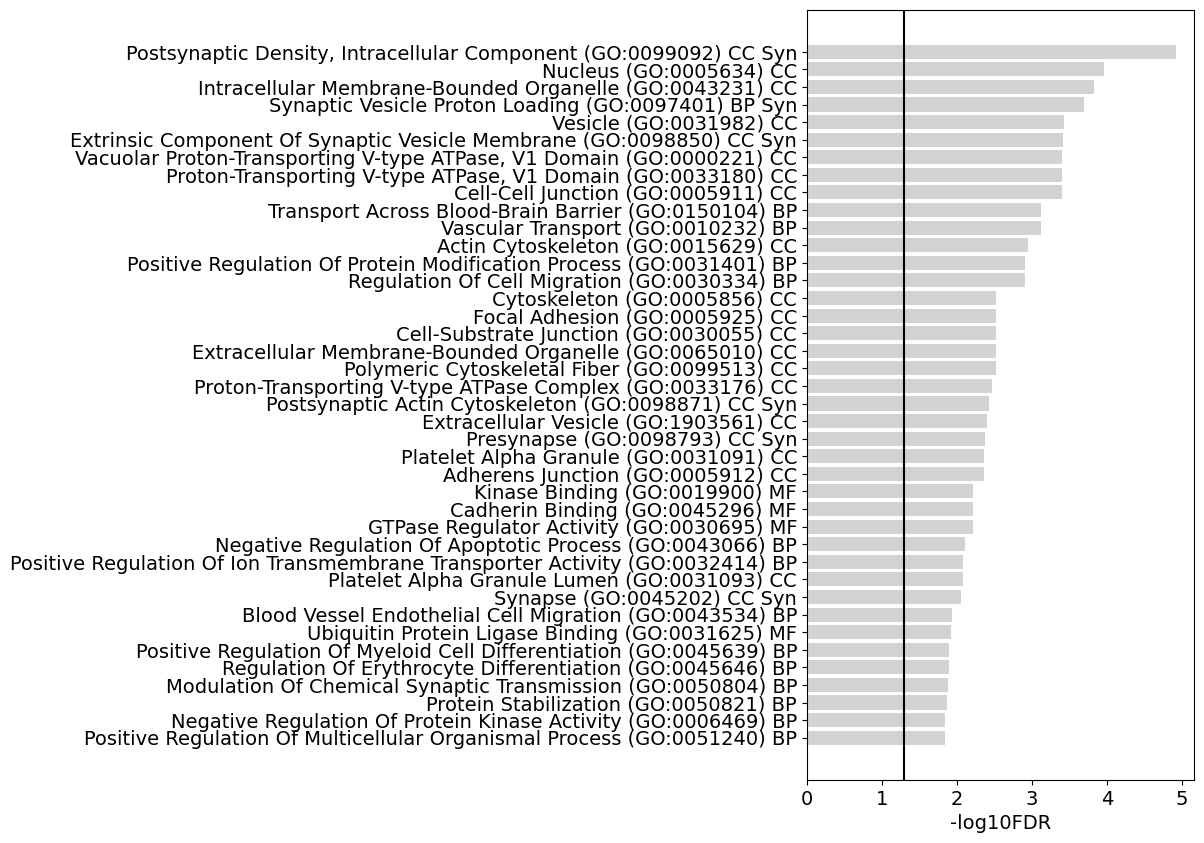

In [21]:
bp = bp[['Term','Adjusted P-value','Genes']]
bp['name'] = 'BP'
cc = cc[['Term','Adjusted P-value','Genes']]
cc['name'] = 'CC'
mf = mf[['Term','Adjusted P-value','Genes']]
mf['name'] = 'MF'
syn = syn[['Term','Adjusted P-value','Genes']]
syn['name'] = 'Syn'

df = pd.concat([bp,mf,cc,syn])
df['-log10FDR'] = -np.log10(df['Adjusted P-value'])
df = df.sort_values('-log10FDR',ascending=False)

df2 = df[:40]

plt.rcParams['font.size']='14'
fig, ax = plt.subplots(figsize=(5,10))
df2 = df[:40]
terms = df2.Term+' '+df2.name
terms = terms[::-1]
plt.barh(terms,df2['-log10FDR'][::-1],color='lightgray')
plt.axvline(-np.log10(0.05),color='k')
plt.xlabel('-log10FDR')

In [22]:
df_new = df[df.Term.isin(['Postsynaptic Density, Intracellular Component (GO:0099092) CC',
                  'Intracellular Membrane-Bounded Organelle (GO:0043231)',
                  'Synaptic Vesicle Proton Loading (GO:0097401) BP',
                  'Proton-Transporting V-type ATPase, V1 Domain (GO:0033180)',
                  'Cell-Cell Junction (GO:0005911)',
                  'Transport Across Blood-Brain Barrier (GO:0150104)',
                  'Vascular Transport (GO:0010232)',
                  'Actin Cytoskeleton (GO:0015629)',
                  'Positive Regulation Of Protein Modification Process (GO:0031401)',
                  'Regulation Of Cell Migration (GO:0030334)',
                  'Cell-Substrate Junction (GO:0030055)',
                  'Polymeric Cytoskeletal Fiber (GO:0099513)',
                  'Focal Adhesion (GO:0005925)',
                  'Extracellular Vesicle (GO:1903561)', 
                  'Adherens Junction (GO:0005912)'
                 ])]

In [23]:
renamed = ['Postsynaptic Density',
           'Membrane-Bounded Organelle',
           'Synaptic Vesicle',
           'Proton-Transporting V-type ATPase',
           'Cell-Cell Junction',
           'Transport Across Blood-Brain Barrier',
           'Vascular Transport',
           'Actin Cytoskeleton',
           'Protein Modification',
           'Cell Migration',
           'Cell-Substrate Junction',
           'Polymeric Cytoskeletal Fiber',
           'Focal Adhesion',
           'Extracellular Vesicle',
           'Adherens Junction']

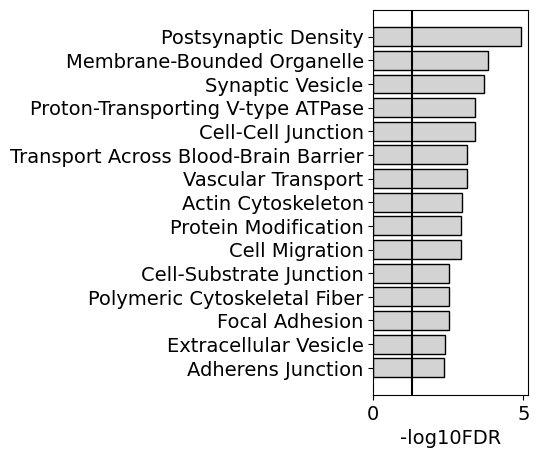

In [24]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.size'] = '14'

fig, ax = plt.subplots(figsize=(2,5))

ax.barh(np.arange(len(renamed)), df_new['-log10FDR'], align='center', color='lightgray', edgecolor='black', linewidth=1)
ax.set_yticks(np.arange(df_new.shape[0]))
ax.set_yticklabels(renamed)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('-log10FDR')
ax.axvline(-np.log10(0.05),color='k')
plt.savefig('/home/ah2428/palmer_scratch/figs/ed3/all_deg_GO.pdf',bbox_inches='tight',dpi=300)

# ED Fig. 3c Top occurring DEGs from 3b

In [25]:
df = df.reset_index(drop=True)

In [26]:
all_genes = []

terms = ['Postsynaptic Density, Intracellular Component (GO:0099092) CC',
                  'Intracellular Membrane-Bounded Organelle (GO:0043231)',
                  'Synaptic Vesicle Proton Loading (GO:0097401) BP',
                  'Proton-Transporting V-type ATPase, V1 Domain (GO:0033180)',
                  'Cell-Cell Junction (GO:0005911)',
                  'Transport Across Blood-Brain Barrier (GO:0150104)',
                  'Vascular Transport (GO:0010232)',
                  'Actin Cytoskeleton (GO:0015629)',
                  'Positive Regulation Of Protein Modification Process (GO:0031401)',
                  'Regulation Of Cell Migration (GO:0030334)',
                  'Cell-Substrate Junction (GO:0030055)',
                  'Polymeric Cytoskeletal Fiber (GO:0099513)',
                  'Focal Adhesion (GO:0005925)',
                  'Extracellular Vesicle (GO:1903561)', 
                  'Adherens Junction (GO:0005912)']
for term in terms:
    genes = df[df.Term==term].Genes.values[0].split(';')
    #genes = df.loc[i]['Genes'].split(';')
    all_genes.append(genes)

In [27]:
all_genes = list(itertools.chain(*all_genes))

In [28]:
count_df = pd.DataFrame(pd.Series(all_genes).value_counts())

In [29]:
df_genes = count_df[count_df['count']>2].index

In [30]:
len(df_genes)

47

In [31]:
mat = np.zeros((len(terms),len(df_genes)))
for ii,term in enumerate(terms):
    for jj,gene in enumerate(df_genes):
        go_genes = df[df.Term==term].Genes.values[0].split(';')
        if gene in go_genes:
            mat[ii,jj] = df[df.Term==term]['-log10FDR']
        else:
            pass

In [32]:
mat_df = pd.DataFrame(mat,index=renamed,columns=df_genes)
mat_df = mat_df.replace(0, np.nan)
mat_df = mat_df.dropna(axis=1, how='all')

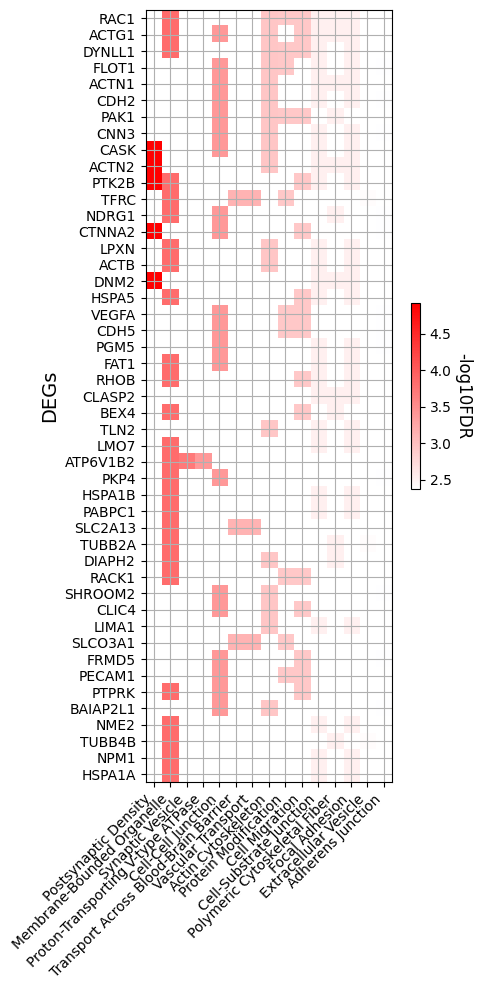

In [34]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
fig, ax = plt.subplots(figsize=(10,10))
plt.rcParams['font.size'] = '10'

p = ax.imshow(mat_df.T,cmap=red_t,aspect='equal')
ax.set_yticks(np.arange(len(mat_df.columns)))
ax.set_yticklabels(mat_df.columns)
ax.set_xticks(np.arange(mat_df.shape[0]))
ax.set_xticklabels(mat_df.index.values,rotation=45,ha='right')
ax.grid(which='major')

cbar = fig.colorbar(p,fraction=0.01,pad=0.02)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('-log10FDR', rotation=270, fontsize=12)

plt.ylabel('DEGs',fontsize=14)
fig.tight_layout()
plt.savefig('/home/ah2428/palmer_scratch/figs/ed3/top_count_degs.svg',bbox_inches='tight',dpi=300,transparent=True)

# ED Fig. 3d Cell type-specific DEG GO

In [35]:
genes = []
mast = pd.read_csv('/home/ah2428/ShareZhangLab/PTSD/RNA/DEG_results_df/snRNA/PTSD_vs_CON/MAST_DEG.csv',sep='\t')
wilcox = pd.read_csv('/home/ah2428/ShareZhangLab/PTSD/RNA/DEG_results_df/snRNA/PTSD_vs_CON/WILCOX_DEG.csv',sep='\t')
mast = mast[abs(mast.log2FC) > np.log(1.2)][mast.FDR < 0.05] 
wilcox = wilcox[abs(wilcox.log2FC) > np.log(1.2)][wilcox.FDR < 0.05] 

for celltype in ['EXC','INH','OLI','OPC','END','AST','MIC']:    
    mast_celltype = mast[mast.Celltype==celltype]
    mast_up = mast_celltype[mast_celltype.log2FC > 0].Genename
    mast_down = mast_celltype[mast_celltype.log2FC < 0].Genename
    wilcox_celltype = wilcox[wilcox.Celltype==celltype]
    wilcox_up = wilcox_celltype[wilcox_celltype.log2FC > 0].Genename
    wilcox_down = wilcox_celltype[wilcox_celltype.log2FC < 0].Genename
    
    inter_up = list(set(mast_up)&set(wilcox_up))
    inter_down = list(set(mast_down)&set(wilcox_down))
    inter_up_down = list(set(inter_up+inter_down))
    
    genes.append(inter_up_down)
    print(len(inter_up_down))
    pd.DataFrame(inter_up_down).to_csv(f'/home/ah2428/ShareZhangLab/PTSD/RNA/GO/celltype_GO/{celltype}_DEG_FDR_0.05.txt',sep='\t',index=None,header=None)

1001
208
135
90
1031
381
253


In [47]:
df_all = []
for s in ['EXC','INH','OLI','OPC','END','AST','MIC']:
    df_celltype = []
    for f in glob.glob(f'/home/ah2428/ShareZhangLab/PTSD/RNA/GO/celltype_GO/enrichr/{s}/*'):
        name = str(f).split('/')[-1].split('.')[0]
        if name in ['MF','BP','CC','SynGO']:
            df = pd.read_csv(f,sep='\t')[['Term','Adjusted P-value']]
            df_celltype.append(df)
    df_celltype = pd.concat(df_celltype)
    df_celltype = df_celltype.sort_values('Adjusted P-value')
    df_celltype = df_celltype[:12]
    df_celltype = df_celltype.set_index('Term').rename(columns={'Adjusted P-value':s})
    df_all.append(df_celltype)
df_all = pd.concat(df_all)
df_new = df_all.groupby(level=0).sum()
df_new = df_new.replace(0.0,np.nan)
df_new = -np.log10(df_new)
df_new = df_new[['EXC','INH','OLI','OPC','END','AST','MIC']]
df_new = df_new.sort_values(by=['EXC','INH','OLI','OPC','END','AST','MIC'],ascending=False)

Text(0.5, 0, '-log10FDR')

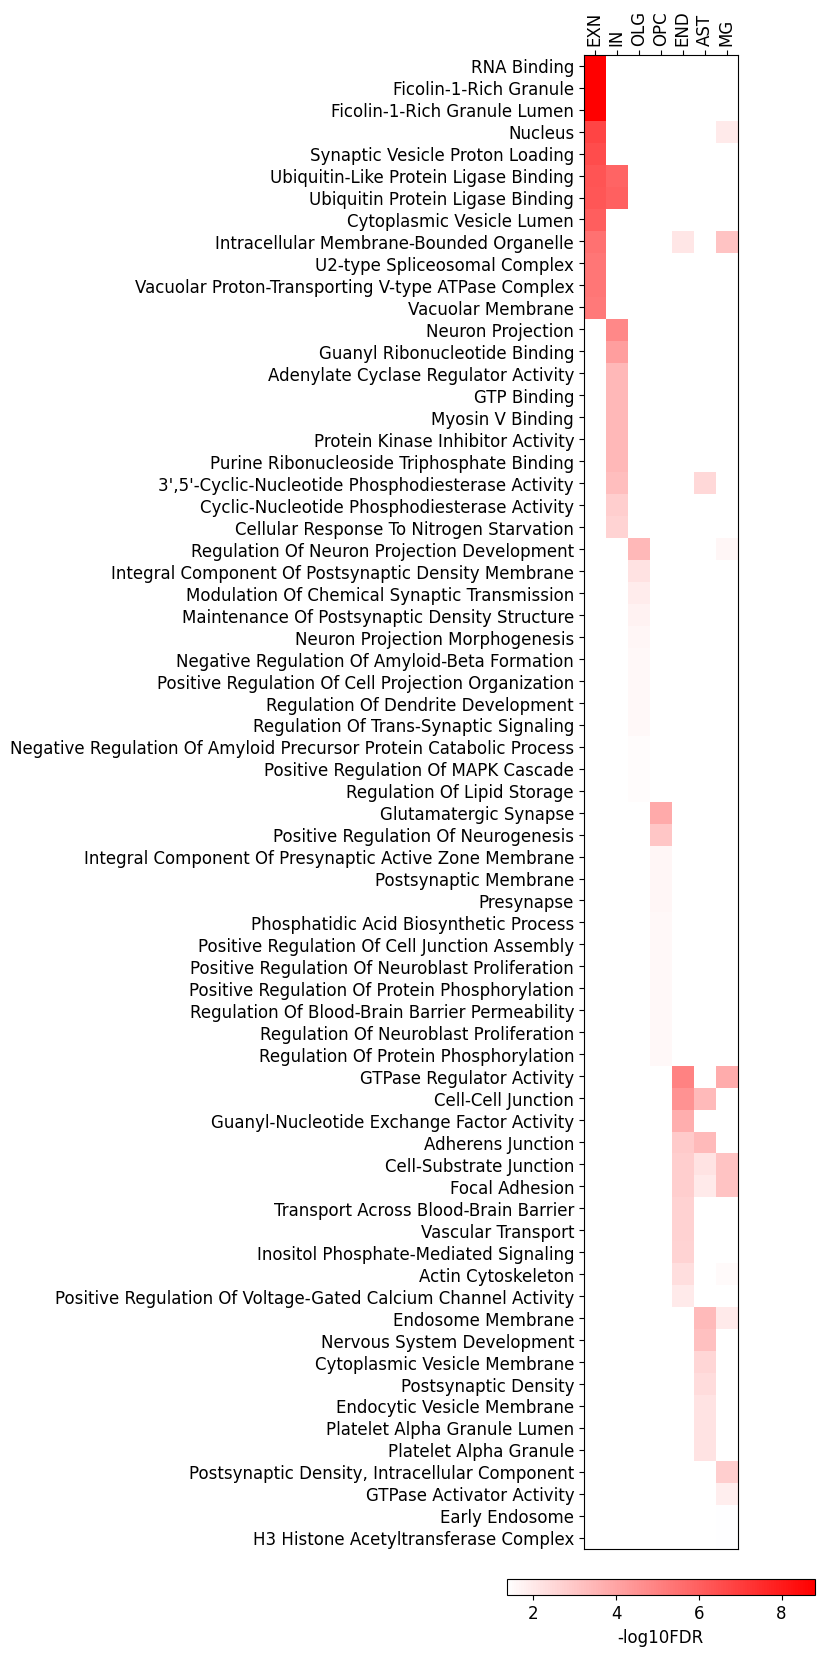

In [49]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
celltypes = df_new.columns
plt.rcParams['font.size'] = '12'

fig, ax = plt.subplots(figsize=(7,20))
p = ax.imshow(np.array(df_new),cmap=red_t)
ax.xaxis.tick_top()
ax.set_xticks(np.arange(len(celltypes)))
ax.set_xticklabels(['EXN','IN','OLG','OPC','END','AST','MG'],rotation=90)
ax.set_yticks(np.arange(df_new.shape[0]))
terms = [x.split(' (')[0] for x in df_new.index.values]
df_new.index = terms
ax.set_yticklabels(terms)

cbar = fig.colorbar(p,fraction=0.01,pad=0.02,orientation='horizontal')
cbar.ax.get_yaxis().labelpad = 10
cbar.ax.set_xlabel('-log10FDR', fontsize=12)

In [50]:
keep = ['RNA Binding','Ficolin-1-Rich Granule','Synaptic Vesicle Proton Loading','Ubiquitin Protein Ligase Binding','Cytoplasmic Vesicle Lumen','Intracellular Membrane-Bounded Organelle',
        'Neuron Projection','Guanyl Ribonucleotide Binding','Adenylate Cyclase Regulator Activity','GTP Binding','Myosin V Binding','Protein Kinase Inhibitor Activity',
        'Regulation Of Neuron Projection Development','Integral Component Of Postsynaptic Density Membrane','Modulation Of Chemical Synaptic Transmission','Maintenance Of Postsynaptic Density Structure','Neuron Projection Morphogenesis','Negative Regulation Of Amyloid-Beta Formation',
        'Glutamatergic Synapse','Positive Regulation Of Neurogenesis','Integral Component Of Presynaptic Active Zone Membrane','Postsynaptic Membrane','Phosphatidic Acid Biosynthetic Process','Positive Regulation Of Cell Junction Assembly',
        'GTPase Regulator Activity','Cell-Cell Junction','Guanyl-Nucleotide Exchange Factor Activity','Adherens Junction','Cell-Substrate Junction','Focal Adhesion','Transport Across Blood-Brain Barrier',
        'Endosome Membrane','Nervous System Development','Cytoplasmic Vesicle Membrane','Endocytic Vesicle Membrane',
        'Postsynaptic Density, Intracellular Component','Early Endosome','H3 Histone Acetyltransferase Complex']
        

In [52]:
df_new = df_new.loc[keep]

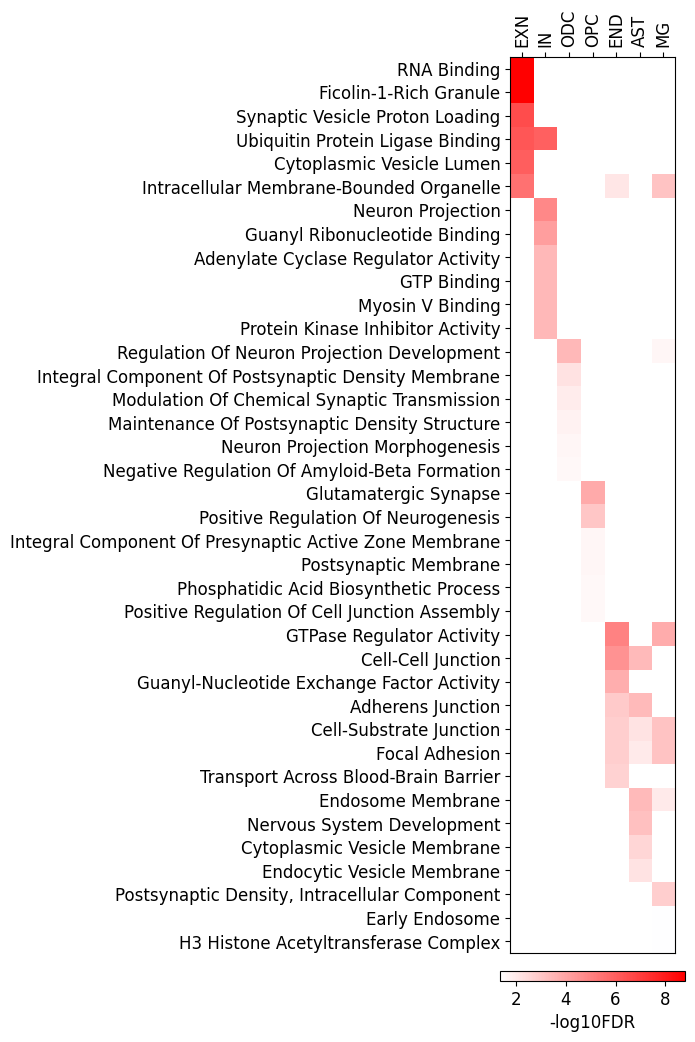

In [53]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
celltypes = df_new.columns
plt.rcParams['font.size'] = '12'

fig, ax = plt.subplots(figsize=(7,12))
p = ax.imshow(np.array(df_new),cmap=red_t)
ax.xaxis.tick_top()
ax.set_xticks(np.arange(len(celltypes)))
ax.set_xticklabels(['EXN','IN','OLG','OPC','END','AST','MG'],rotation=90)
ax.set_yticks(np.arange(df_new.shape[0]))
terms = [x.split(' (')[0] for x in df_new.index.values]
ax.set_yticklabels(terms)
#ax.set_aspect(aspect=0.1)

cbar = fig.colorbar(p,fraction=0.01,pad=0.02,orientation='horizontal',ticks=[2, 4, 6, 8])
cbar.ax.get_yaxis().labelpad = 10
cbar.ax.set_xlabel('-log10FDR', fontsize=12)

plt.savefig('/home/ah2428/palmer_scratch/figs/ed3/celltype_GO.pdf',bbox_inches='tight',dpi=300)

# ED Fig. 3e Bulk PTSD comparison

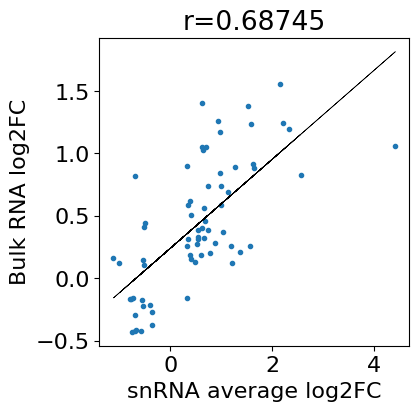

In [54]:
bulk_deg = pd.read_csv('/gpfs/gibbs/pi/gerstein/jz435/ShareZhangLab/PTSD/RNA/jiawei_ptsd_degs.csv')
sc_deg = pd.read_csv('/home/ah2428/palmer_scratch/supp_tables/PTSD_DEG_MAST_and_Wilcox.csv',sep='\t')
sc_deg = sc_deg[sc_deg.Celltype.isin(['EXN','IN','OLG','OPC','END','AST','MG'])]
bulk_deg = bulk_deg[bulk_deg['PTSD.dlPFC.padj'] < 0.05]

bulk_fcs = []
sc_fcs = []
for g in list(set(sc_deg.Genename.unique())&set(bulk_deg.Genename.unique())):
    bulk_fc = bulk_deg[bulk_deg.Genename==g]['PTSD.dlPFC.log2FoldChange'].values[0]
    sc_fc = sc_deg[sc_deg.Genename==g]['MAST log2FC'].values.mean()
    bulk_fcs.append(bulk_fc)
    sc_fcs.append(sc_fc)

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.size'] = '16'
fig, ax = plt.subplots(figsize=(4,4))
x = sc_fcs
y = bulk_fcs
x = np.array(x)
y = np.array(y)

ax.plot(x,y,'.')
corr = np.corrcoef(x,y)[0][1]
r2 = np.round(corr**2,2)
m, b = np.polyfit(x,y,1)
ax.plot(x, m*x+b, color='k',linewidth=0.5)
ax.set_title(f'r={np.round(corr,5)}')
ax.set_xlabel('snRNA average log2FC')
ax.set_ylabel('Bulk RNA log2FC')
plt.savefig('/home/ah2428/palmer_scratch/figs/ed3/PTSD_bulk_vs_snrna_log2FC.pdf',bbox_inches='tight',dpi=300)

# ED Fig. 3f Chatzinakos PTSD comparison

In [56]:
hwang = pd.read_csv('/home/ah2428/ShareZhangLab/PTSD/RNA/DEG_results_df/snRNA/PTSD_vs_CON/MAST_WILCOX_intersect.csv',sep='\t')
chat = pd.read_csv('/home/ah2428/ShareZhangLab/PTSD/RNA/chatzinakos_PTSD_degs.csv',sep=',',header=1)

downs, ups = [], []
down_ratios, up_ratios = [], []
inter_genes = []

hwang_ups = []
hwang_downs = []
inter_ups = []
inter_downs = []
for celltype,celltype2 in zip(['EXC','INH','OLI','OPC','END','AST','MIC'],['Ex','In','Oligo','OPC','Endo','Astro','Microglia']):
    hwang_celltype = hwang[hwang.Celltype==celltype]
    hwang_celltype_up = hwang_celltype[hwang_celltype.log2FC > 0].Genename.values
    hwang_celltype_down = hwang_celltype[hwang_celltype.log2FC < 0].Genename.values
    chat_celltype = chat[chat.Cell_type_Bulk==celltype2]
    chat_celltype_up = chat_celltype[chat_celltype.logFC > 0].genes.values
    chat_celltype_down = chat_celltype[chat_celltype.logFC < 0].genes.values
    hwang_ups.append(hwang_celltype_up)
    hwang_downs.append(hwang_celltype_down)
    
    inter_up = list(set(hwang_celltype_up) & set(chat_celltype_up))
    inter_down = list(set(hwang_celltype_down) & set(chat_celltype_down))
    inter_ups.append(inter_up)
    inter_downs.append(inter_down)
    
    downs.append(len(inter_down))
    ups.append(len(inter_up))
    inter_gene = inter_down+inter_up
    inter_genes.append(inter_gene)
    down_ratios.append(np.round(len(inter_down)/len(hwang_celltype_down),2))
    up_ratios.append(np.round(len(inter_up)/len(hwang_celltype_up),2))
d = pd.DataFrame([downs,ups,down_ratios,up_ratios])
d = d.T
d.columns = ['Down','Up','Ratio Down','Ratio Up']
d.index = ['EXN','IN','OLG','OPC','END','AST','MG']
d['Down'] = d['Down'].astype(int)
d['Up'] = d['Up'].astype(int)
d

,Down,Up,Ratio Down,Ratio Up
EXN,38,114,0.72,0.42
IN,11,20,0.92,0.37
OLG,32,6,0.76,0.38
OPC,13,5,0.72,0.36
END,308,126,0.74,0.76
AST,52,65,0.72,0.52
MG,41,14,0.42,0.70


In [57]:
df1 = pd.DataFrame(data={'inter':[len(x) for x in inter_ups],'hwang':[len(x) for x in hwang_ups]})
df2 = pd.DataFrame(data={'inter':[len(x) for x in inter_downs],'hwang':[len(x) for x in hwang_downs]})

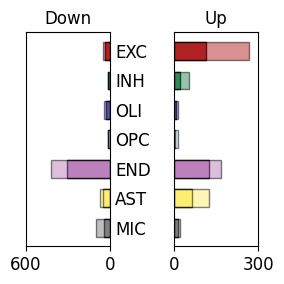

In [59]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.size'] = '12'

fig, ax = plt.subplots(1,2, figsize=(3,3))
plt.subplots_adjust(wspace=0)

colors = [celltype_colors[x] for x in ['EXC','INH','OLI','OPC','END','AST','MIC']]

ax[1].barh(np.arange(7), df1.inter[::-1],color = colors[::-1], height=0.6,edgecolor='k')
ax[1].barh(np.arange(7), df1.hwang[::-1],color = colors[::-1], alpha=0.5, height=0.6,edgecolor='k')
ax[1].set_yticks([]) 
ax[1].set_xlim([0,300])
ax[1].set(xticks=[0,300])
ax[1].set_title('Up',fontsize=12)

ax[0].barh(np.arange(7), list(np.array(df2.inter)*-1)[::-1],color = colors[::-1], height=0.6,edgecolor='k')
ax[0].barh(np.arange(7), list(np.array(df2.hwang)*-1)[::-1],color = colors[::-1], alpha=0.5, height=0.6,edgecolor='k')
ax[0].set_yticks(np.arange(7))
ax[0].set_yticklabels(celltypes[::-1])
ax[0].yaxis.tick_right()
ax[0].tick_params(axis='y', which=u'both',length=0)
ax[0].set_xlim([-600,0])
ax[0].set(xticks=[0,-600],xticklabels=[0,600])
ax[0].set_title('Down',fontsize=12)

fig.tight_layout()

# ED Fig 3g. Chatzinakos MDD comparison

In [61]:
hwang = pd.read_csv('/home/ah2428/ShareZhangLab/PTSD/RNA/DEG_results_df/snRNA/MDD_vs_CON/MAST_WILCOX_intersect.csv',sep='\t')
chat = pd.read_csv('/home/ah2428/ShareZhangLab/PTSD/RNA/chatzinakos_MDD_degs.csv',sep=',',header=1)

downs, ups = [], []
down_ratios, up_ratios = [], []
inter_genes = []

hwang_ups = []
hwang_downs = []
inter_ups = []
inter_downs = []
for celltype,celltype2 in zip(['EXC','INH','OLI','OPC','END','AST','MIC'],['Ex','In','Oligo','OPC','Endo','Astro','Microglia']):
    hwang_celltype = hwang[hwang.Celltype==celltype]
    hwang_celltype_up = hwang_celltype[hwang_celltype.log2FC > 0].Genename.values
    hwang_celltype_down = hwang_celltype[hwang_celltype.log2FC < 0].Genename.values
    chat_celltype = chat[chat.Cell_type_Bulk==celltype2]
    chat_celltype_up = chat_celltype[chat_celltype.logFC > 0].genes.values
    chat_celltype_down = chat_celltype[chat_celltype.logFC < 0].genes.values
    hwang_ups.append(hwang_celltype_up)
    hwang_downs.append(hwang_celltype_down)
    
    inter_up = list(set(hwang_celltype_up) & set(chat_celltype_up))
    inter_down = list(set(hwang_celltype_down) & set(chat_celltype_down))
    inter_ups.append(inter_up)
    inter_downs.append(inter_down)
    
    downs.append(len(inter_down))
    ups.append(len(inter_up))
    inter_gene = inter_down+inter_up
    inter_genes.append(inter_gene)
    down_ratios.append(np.round(len(inter_down)/len(hwang_celltype_down),2))
    up_ratios.append(np.round(len(inter_up)/len(hwang_celltype_up),2))
d = pd.DataFrame([downs,ups,down_ratios,up_ratios])
d = d.T
d.columns = ['Down','Up','Ratio Down','Ratio Up']
d.index = ['EXN','IN','OLG','OPC','END','AST','MG']
d['Down'] = d['Down'].astype(int)
d['Up'] = d['Up'].astype(int)
d

,Down,Up,Ratio Down,Ratio Up
EXN,7,16,1.00,0.35
IN,71,68,0.85,0.39
OLG,28,29,0.50,0.45
OPC,37,33,0.71,0.67
END,622,137,0.74,0.83
AST,127,189,0.77,0.95
MG,192,127,0.78,0.78


In [62]:
df1 = pd.DataFrame(data={'inter':[len(x) for x in inter_ups],'hwang':[len(x) for x in hwang_ups]})
df2 = pd.DataFrame(data={'inter':[len(x) for x in inter_downs],'hwang':[len(x) for x in hwang_downs]})

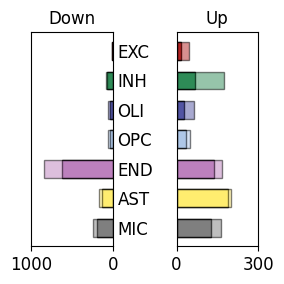

In [64]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.size'] = '12'

fig, ax = plt.subplots(1,2, figsize=(3,3))
plt.subplots_adjust(wspace=0)

colors = [celltype_colors[x] for x in ['EXC','INH','OLI','OPC','END','AST','MIC']]

ax[1].barh(np.arange(7), df1.inter[::-1],color = colors[::-1], height=0.6,edgecolor='k')
ax[1].barh(np.arange(7), df1.hwang[::-1],color = colors[::-1], alpha=0.5, height=0.6,edgecolor='k')
ax[1].set_yticks([]) 
ax[1].set_xlim([0,300])
ax[1].set(xticks=[0,300])
ax[1].set_title('Up',fontsize=12)

ax[0].barh(np.arange(7), list(np.array(df2.inter)*-1)[::-1],color = colors[::-1], height=0.6,edgecolor='k')
ax[0].barh(np.arange(7), list(np.array(df2.hwang)*-1)[::-1],color = colors[::-1], alpha=0.5, height=0.6,edgecolor='k')
ax[0].set_yticks(np.arange(7))
ax[0].set_yticklabels(celltypes[::-1])
ax[0].yaxis.tick_right()
ax[0].tick_params(axis='y', which=u'both',length=0)
ax[0].set_xlim([-1000,0])
ax[0].set(xticks=[0,-1000],xticklabels=[0,1000])
ax[0].set_title('Down',fontsize=12)

fig.tight_layout()